# Modeling and Predicting Housing Prices in King County, USA: Analyzing House Sales Data

Author: Hazman Naim Bin Ahsan

## Overview

In this data science project, I undertook the role of a Data Analyst, I undertook an exciting project within the realm of real estate investment for a Real Estate Investment Trust. The objective of this assignment was to analyze and predict housing prices in the residential real estate market of King County, which encompasses the vibrant city of Seattle. By leveraging data science techniques and machine learning algorithms, I aimed to determine the market price of a house based on a set of essential features.

## Tools used:

## 1. Collect and Prepare Data

For this project, I utilized an extensive dataset containing house sale prices for King County, covering the period from May 2014 to May 2015. The dataset was sourced from Kaggle, and you can access it using the following link: [Kaggle Dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01)

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


Import necessary libraries and packages.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

Load the data.

In [ ]:
df = pd.read_csv('kc_house_data_NaN.csv')

In [ ]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## 2. Exploratory Data Analysis

### 2.1 Data Cleaning

Use the method `describe` and `info` to obtain a statistical summary of the dataframe and to check missing values.

In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
# List columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Count missing values for each column
missing_values_count = df[columns_with_missing_values].isnull().sum()

print("Columns with missing values:")
print(columns_with_missing_values)

print("\nMissing values count for each column:")
print(missing_values_count)

Columns with missing values:
['bedrooms', 'bathrooms']

Missing values count for each column:
bedrooms     13
bathrooms    10
dtype: int64


Drop the columns "id" and "Unnamed: 0" from axis 1 using the method `drop()`

In [ ]:
df.drop(["id","Unnamed: 0"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Replace the missing values of the column "bedrooms" and "bathrooms" with the mean of the column "bedrooms" and "bathrooms" using the method `replace()`.

In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### 2.2 Correlation and Relationship

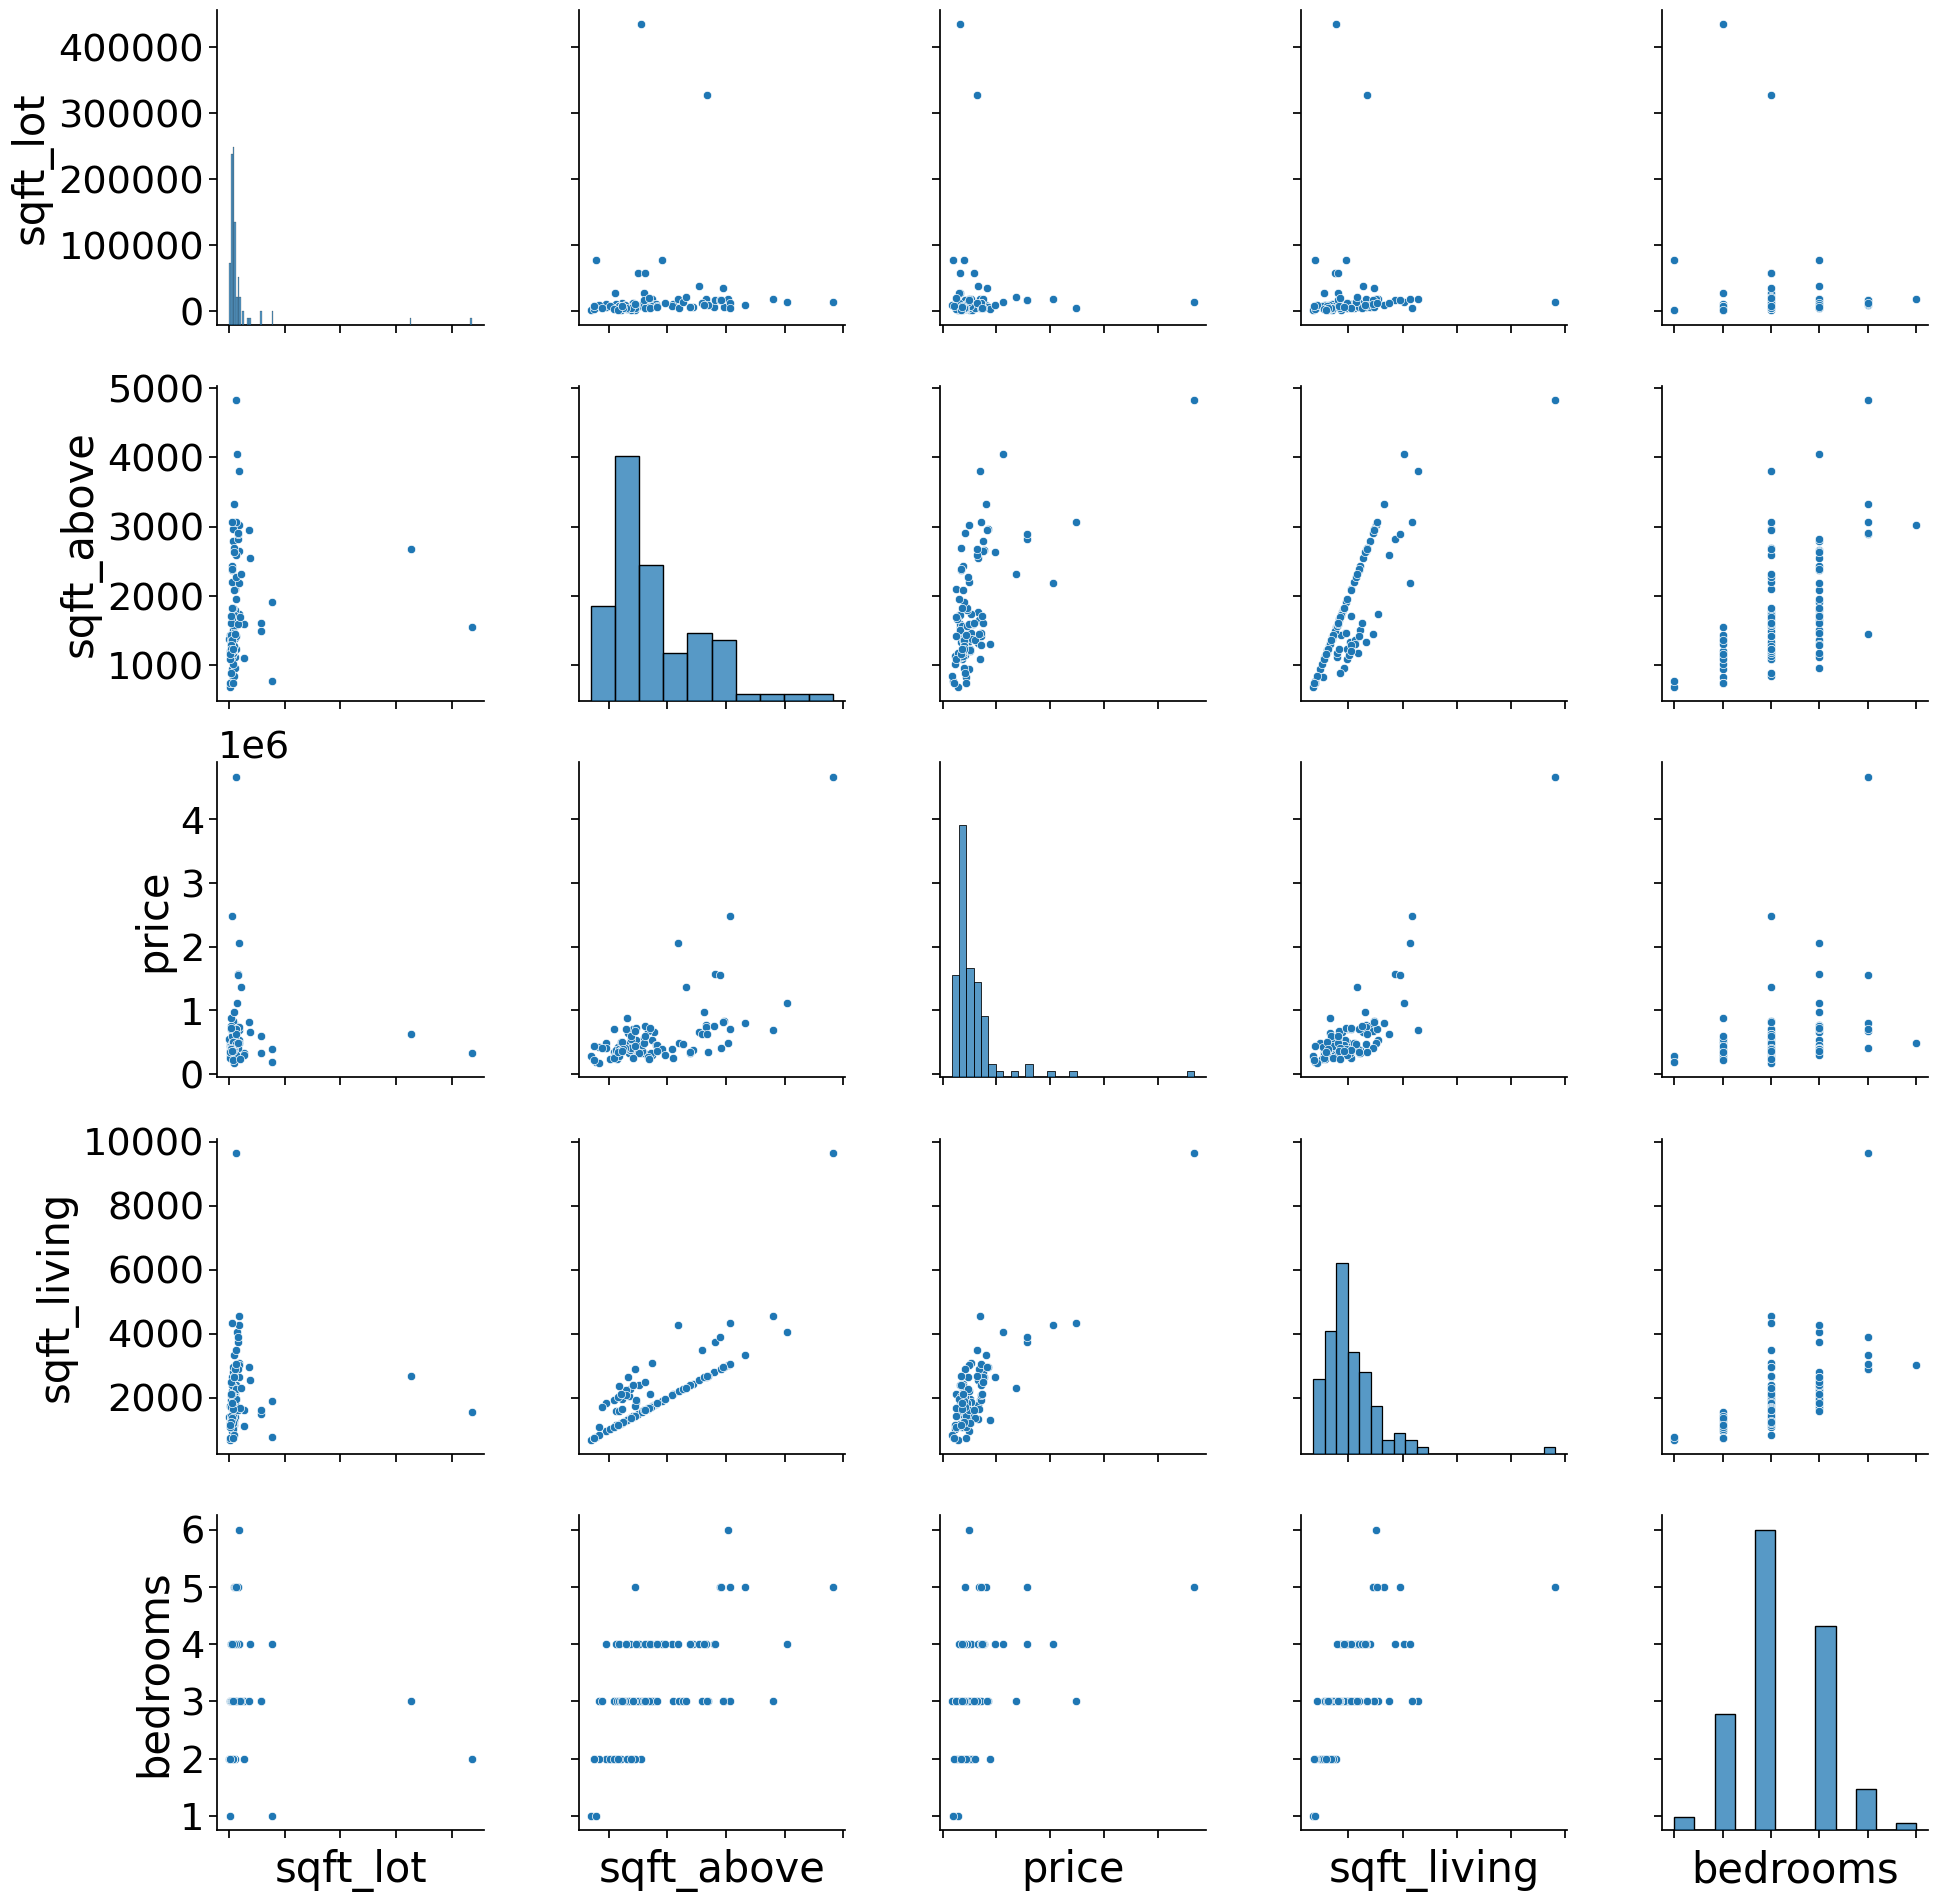

In [ ]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']].sample(100),height=4)
g.set(xticklabels=[]);

<Axes: title={'center': 'Pearson Correlation of features'}>

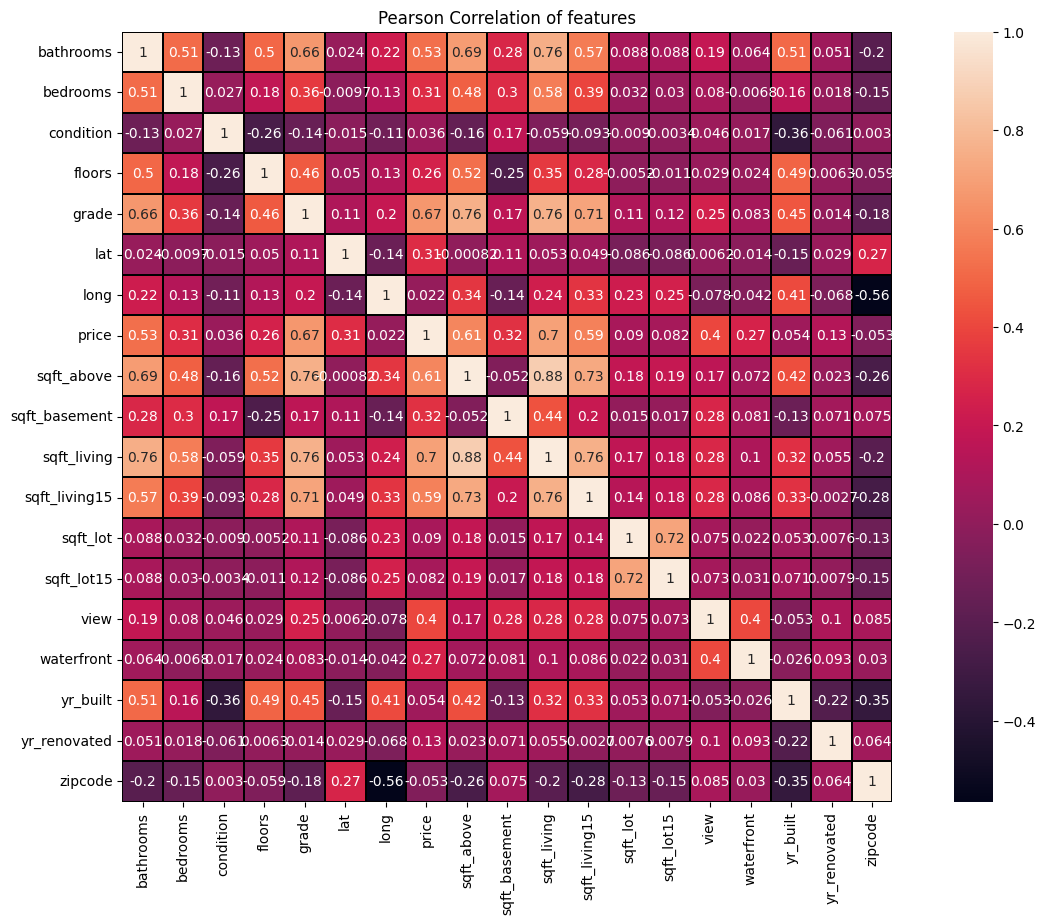

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.items():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = df.columns.difference(str_list)
# Create Dataframe containing only numerical features
house_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 10))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True)

In [ ]:
df.corr()['price'].sort_values()

<ipython-input-25-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## 4. Model Development

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### 4.1 Linear Model

#### 4.1.1 OLS Linear Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

predictions = lr.predict(x_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
lr_mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {lr_mae:.2f}")

# Calculate Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")

# Calculate R-squared (R2-score)
lr_r2 = r2_score(y_test, predictions)
print(f"R2-score: {lr_r2:.2f}")

Mean Absolute Error: 136078.65
Mean Squared Error (MSE): 51755993391.33
R2-score: 0.65


#### 4.1.2 Ridge Regression Model

In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

rm = Ridge(alpha=0.1)
rm.fit(x_train_pr, y_train)

predictions = rm.predict(x_test_pr)

In [ ]:
# Calculate Mean Absolute Error (MAE)
rm_mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {rm_mae:.2f}")

# Calculate Mean Squared Error (MSE)
rm_mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {rm_mse:.2f}")

# Calculate R-squared (R2-score)
rm_r2 = r2_score(y_test, predictions)
print(f"R2-score: {rm_r2:.2f}")

Mean Absolute Error: 119699.87
Mean Squared Error (MSE): 44013993725.63
R2-score: 0.70


#### 4.1.3 Lasso Model

In [ ]:
lasso = Lasso(alpha=.05)
lasso.fit(x_train,y_train)

predictions = lasso.predict(x_test);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+13, tolerance: 2.437e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculate Mean Absolute Error (MAE)
las_mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {las_mae:.2f}")

# Calculate Mean Squared Error (MSE)
las_mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {las_mse:.2f}")

# Calculate R-squared (R2-score)
las_r2 = r2_score(y_test, predictions)
print(f"R2-score: {las_r2:.2f}")

Mean Absolute Error: 135857.05
Mean Squared Error (MSE): 51707508430.75
R2-score: 0.65


### 4.2 Random Forest Model

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)

predictions = forest_model.predict(x_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
rfm_mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {rfm_mae:.2f}")

# Calculate Mean Squared Error (MSE)
rfm_mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {rfm_mse:.2f}")

# Calculate R-squared (R2-score)
rfm_r2 = r2_score(y_test, predictions)
print(f"R2-score: {rfm_r2:.2f}")

Mean Absolute Error: 91012.84
Mean Squared Error (MSE): 32268256431.98
R2-score: 0.78


## 5. Model Evaluation

In [ ]:
Report ={
    "Model":['Linear Regression', 'Ridge Regression', 'Lasso', 'Random Forest'],
    "Mean Absolute Error" : [lr_mae, rm_mae, las_mae, rfm_mae],
    "Mean Squared Error": [lr_mse, rm_mse, las_mse, rfm_mse],
    "R2-Score": [lr_r2, rm_r2, las_r2, rfm_r2]
}
pd.DataFrame(Report)

,Model,Mean Absolute Error,Mean Squared Error,R2-Score
0,Linear Regression,136078.645759,5.175599e+10,0.647553
1,Ridge Regression,119699.873833,4.401399e+10,0.700274
2,Lasso,135857.054133,5.170751e+10,0.647883
3,Random Forest,91012.840637,3.226826e+10,0.780260
